### 1) Generate and visualize 5000 data points belonging to the following distributions:
#### Uniform Distribution - between interval 30 and 40


In [16]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(4.5,3)})

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform ')]

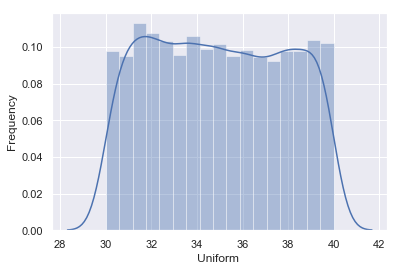

In [39]:
from scipy.stats import uniform
import numpy as np

# random numbers from uniform distribution
# Generate 5000 numbers from 0 to 10
n = 5000
a = 30
b = 40
#data_uniform = uniform.rvs(size=n, loc = a, scale=b)
data_uniform = np.random.uniform(a,b,5000)
ax = sns.distplot(data_uniform)
ax.set(xlabel='Uniform ', ylabel='Frequency')

#### Normal Distribution - with mean 40.5 and standard deviation 13

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal')]

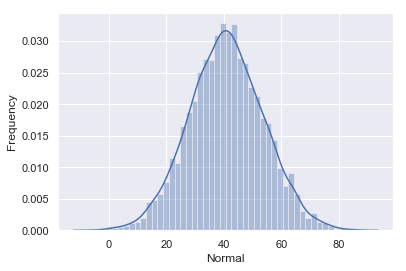

In [56]:
from scipy.stats import norm
# generate random numbersfrom N(0,1)
data_normal = norm.rvs(size=5000,loc=40.5,scale=13)
ax = sns.distplot(data_normal)
ax.set(xlabel='Normal', ylabel='Frequency')

#### Bernoulli Distribution - with mean 0.7

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli')]

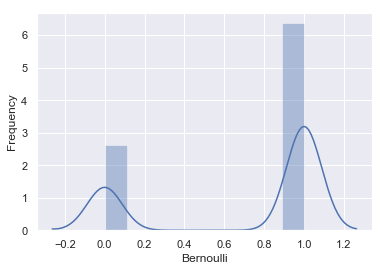

In [64]:
from scipy.stats import bernoulli
# generate bernoulli
data_bern = bernoulli.rvs(size=5000,p=0.700)
ax= sns.distplot(data_bern)
ax.set(xlabel='Bernoulli', ylabel='Frequency')

In [65]:
np.mean(data_bern)

0.7074

#### Binomial Distribution - with mean 10 and repeat it 20 times

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

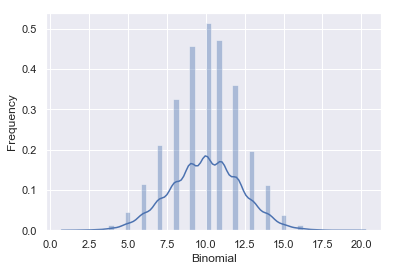

In [72]:
from scipy.stats import binom
data_binom = binom.rvs(n=20,p=0.5,size=5000)
ax = sns.distplot(data_binom)
ax.set(xlabel='Binomial', ylabel='Frequency')

#### Poisson Distribution - mean 4

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson')]

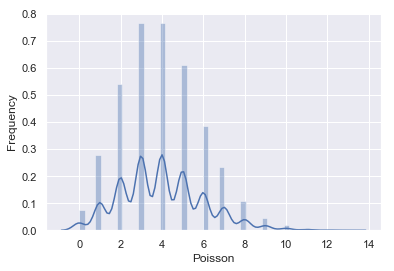

In [73]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=4, size=5000)
ax = sns.distplot(data_poisson)
ax.set(xlabel='Poisson', ylabel='Frequency')

#### Beta Distribution - alpha 7, beta 1

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Beta(1,1)')]

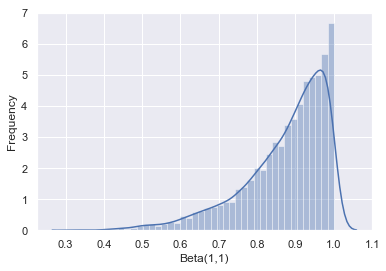

In [78]:
from scipy.stats import beta
#Let us generate 5000, random numbers from Beta distribution with alpha = 7 and beta = 1. The histogram of Beta(1,1) is a uniform distribution.
data_beta = beta.rvs(a=7, b=1, size=5000)
ax = sns.distplot(data_beta)
ax.set(xlabel='Beta(1,1)', ylabel='Frequency')

#### Gamma Distribution - shape 10

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Gamma')]

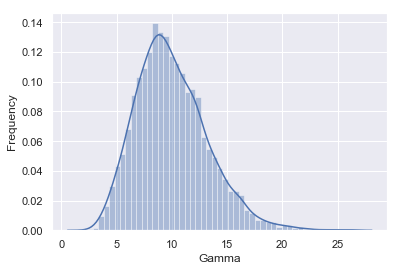

In [79]:
from scipy.stats import gamma

data_gamma = gamma.rvs(a=10, size=5000)
ax = sns.distplot(data_gamma)
ax.set(xlabel='Gamma', ylabel='Frequency')

#### Log Normal Distribution - shape 0.5

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Log Normal')]

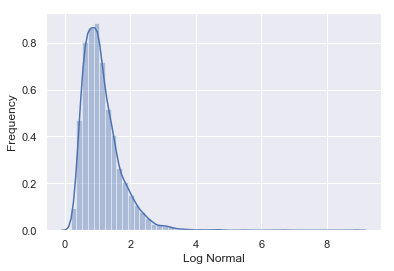

In [91]:
from scipy.stats import lognorm

data_lognorm = lognorm.rvs(s=0.5, size=5000)
ax = sns.distplot(data_lognorm)
ax.set(xlabel='Log Normal', ylabel='Frequency')

#### Negative Binomial Distribution - prob of success 0.4 n 10

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Negative Binomial')]

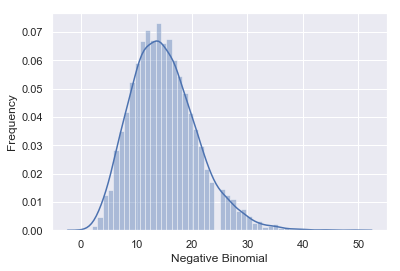

In [92]:
from scipy.stats import nbinom
data_nbinom = nbinom.rvs(10, 0.4, size=5000)
ax = sns.distplot(data_nbinom)
ax.set(xlabel='Negative Binomial', ylabel='Frequency')

### 2) Load the iris dataset

In [127]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()


{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

### 3) Visualize the summary statistics for the data after grouping them based on target

sepal length (cm)


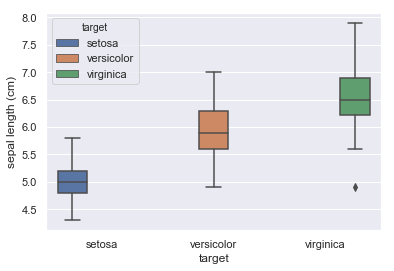

sepal width (cm)


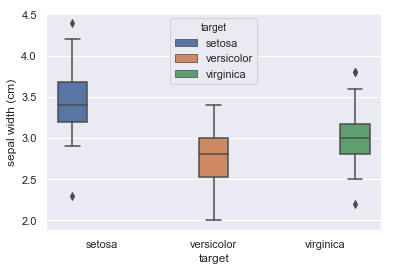

petal length (cm)


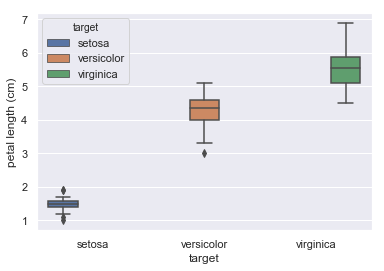

petal width (cm)


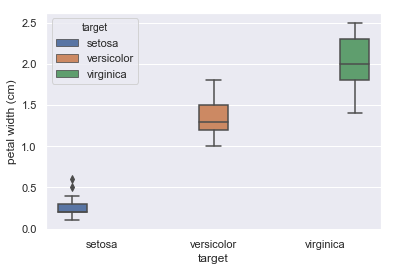

In [134]:
irisDS = pd.DataFrame(data=iris.data,columns=iris.feature_names)
irisDS["target"] = iris.target
irisDS["target"]=irisDS["target"].map(dict(enumerate(iris.target_names)))
irisDS.groupby(irisDS["target"]).describe()



summary = irisDS.groupby('target').apply(lambda x : x.describe().rename_axis('metric').reset_index()).reset_index(level=0)

#print(summary)

col_names = list(irisDS.columns)
col_names.remove('target')
#print(col_names)

for colum in col_names:
    print(colum)
    ax=sns.boxplot(x="target", y=colum, hue="target", data=irisDS)
    #ax.legend_.remove()
    plt.show()

### 4) Do a 1 way F-test, 2 way t-test and ANOVA and print the results of whether the independent variables are different or not for the different groups.

In [156]:
import scipy.stats as stats
stats.f_oneway(irisDS[irisDS.target=="setosa"]['sepal length (cm)'],
              irisDS[irisDS.target=="versicolor"]['sepal length (cm)'],
              irisDS[irisDS.target=="virginica"]['sepal length (cm)'])

for fn in iris.feature_names:
    print("This is one way F-test for --> " + fn)
    print(stats.f_oneway(irisDS[irisDS.target=="setosa"][fn],
          irisDS[irisDS.target=="versicolor"][fn],
          irisDS[irisDS.target=="virginica"][fn]))
    print("\n")
    
    
for fn in iris.feature_names:
    print("This is t-test for --> " + fn)
    print("setosa vs versicolor--> ",end="")
    print(stats.ttest_ind(irisDS[irisDS.target=="setosa"][fn],
          irisDS[irisDS.target=="versicolor"][fn],
          equal_var=False))
    print("setosa vs virginica--> ",end="")
    print(stats.ttest_ind(irisDS[irisDS.target=="setosa"][fn],
          irisDS[irisDS.target=="virginica"][fn],
          equal_var=False))
    print("versicolor vs virginica--> ",end="")
    print(stats.ttest_ind(irisDS[irisDS.target=="versicolor"][fn],
          irisDS[irisDS.target=="virginica"][fn],
          equal_var=False))
    print("\n")

This is one way F-test for --> sepal length (cm)
F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)


This is one way F-test for --> sepal width (cm)
F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)


This is one way F-test for --> petal length (cm)
F_onewayResult(statistic=1180.161182252981, pvalue=2.8567766109615584e-91)


This is one way F-test for --> petal width (cm)
F_onewayResult(statistic=960.007146801809, pvalue=4.169445839443116e-85)


This is t-test for --> sepal length (cm)
setosa vs versicolor--> Ttest_indResult(statistic=-10.52098626754911, pvalue=3.746742613983842e-17)
setosa vs virginica--> Ttest_indResult(statistic=-15.386195820079404, pvalue=3.9668672709859296e-25)
versicolor vs virginica--> Ttest_indResult(statistic=-5.629165259719801, pvalue=1.8661443873771216e-07)


This is t-test for --> sepal width (cm)
setosa vs versicolor--> Ttest_indResult(statistic=9.454975848128596, pvalue=2.484227895747709e-15)
setosa vs vi

In [143]:
stats.ttest_ind()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']